### Importing all the required Libraries

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
import string
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import re
%matplotlib inline
import sqlite3
import json
import csv
from sqlalchemy import create_engine
from pandas import DataFrame
import mysql.connector as connection
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import sqlalchemy
import pymysql
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

### Reading the excel file

In [2]:
dd = pd.read_excel("C:/Users/35387/Downloads/DS_Assignment_Dec7th (1)/Assignment_KC_DS_Dec7th/Task 4/Task 4_ Data Dictionary.xlsx")

In [3]:
dd

,TABLE,STANDARDIZED_COLUMN_NAME,COLUMN_TYPE,NOTES
0,loan_information,loan_id,int,key for loan
1,loan_information,account_number,varchar,"key for account, generally you can assume that..."
2,loan_information,customer_id,int,key for customer
3,loan_information,enterprise_id,int,key for enterprise
4,loan_information,screening_date,date,when the loan was screened making an important...
5,loan_information,product_code,varchar,"type of product, if the last letter of product..."
6,loan_information,hub_id,int,which branch processed the loan
7,enterprise_information,enterprise_id,int,key for enteprise
8,enterprise_information,business_type,varchar,super category of business
9,enterprise_information,business_activity,varchar,sub category of business sector


In [4]:
#db = pymysql.connect(host = '127.0.0.1', port=3306, passwd='Richieroxy@1', user = 'root', db='task4')

### Connecting the data base file to the local host by giving away the necessary credentials 

### Had to write down a querry to collect all the distinct data from all the four tables and join all the four tables based on the respective primary and secondary keys of the respective tables

In [5]:
mydb = connection.connect(host="127.0.0.1", database = 'task4',user="root", passwd="Richieroxy@1",use_pure=True)
query = "SELECT distinct loan_information.loan_id, loan_information.account_number, customer_id,loan_information.enterprise_id,screening_date,product_code,hub_id,business_type,business_activity,business_sector,ManagAgeui_APP,BusinFormalityOfTheBusinessui,ManagCBscoreui_APP,total_disbursement_amount,disbursement_month FROM loan_information join enterprise_information on loan_information.enterprise_id = enterprise_information.enterprise_id join scores_information on loan_information.loan_id = scores_information.loan_id join disbursement_information on disbursement_information.account_number = loan_information.account_number;"
df = pd.read_sql(query,mydb)
mydb.close()

### Displaying the data in a dataframe here

In [6]:
df

,loan_id,account_number,customer_id,enterprise_id,screening_date,product_code,hub_id,business_type,business_activity,business_sector,ManagAgeui_APP,BusinFormalityOfTheBusinessui,ManagCBscoreui_APP,total_disbursement_amount,disbursement_month
0,39501,,95763,32479.0,,,63,,Retail,Plastics,26.0,Cash & Non Banked,0.0,,
1,36747,,89761,30471.0,,,46,Trading,Retail,Fashion,29.0,,679.0,,
2,14517,,33453,11491.0,,,38,,Retail,Electronics,33.0,Cash & Non Banked,754.0,,
3,23406,,57927,19878.0,,,25,Manufacturing,Job Work,Machine Components,36.0,Cash & Non Banked,757.0,,
4,54256,,15276,5369.0,,,26,Manufacturing,Job Work,Electronics,29.0,Invoice & Banked,779.0,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2471,40097,TLWCU0010291,30173,10419.0,,TLWCU,15,Trading,Retail,Fashion,40.0,Cash & Banked,765.0,500000.0,Sep-2018
2472,20866,TLWCU0005932,12167,4369.0,,TLWCU,3,Trading,Retail,Industrial,39.0,Cash & Non Banked,653.0,250000.0,Jan-2018
2473,43691,TLWCU0010995,105435,35679.0,,TLWCU,30,Trading,Retail,Fashion,41.0,Cash & Non Banked,607.0,400000.0,Oct-2018
2474,33894,TLWCS0006851,29274,10139.0,,TLWCS,75,Trading,Whole Sale,Automobiles,35.0,Invoice & Banked,752.0,400000.0,Jul-2018


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2476 entries, 0 to 2475
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   loan_id                        2476 non-null   int64 
 1   account_number                 2476 non-null   object
 2   customer_id                    2476 non-null   int64 
 3   enterprise_id                  2476 non-null   object
 4   screening_date                 2476 non-null   object
 5   product_code                   2476 non-null   object
 6   hub_id                         2476 non-null   int64 
 7   business_type                  2476 non-null   object
 8   business_activity              2476 non-null   object
 9   business_sector                2476 non-null   object
 10  ManagAgeui_APP                 2476 non-null   object
 11  BusinFormalityOfTheBusinessui  2476 non-null   object
 12  ManagCBscoreui_APP             2476 non-null   object
 13  tot

### Checking for null values here and it shows it as 0, very well designed as there are a lot of missing values but not null and instead are present in the form of blank space and need to get rid of them in the next few steps

In [8]:
df.isnull().sum()

loan_id                          0
account_number                   0
customer_id                      0
enterprise_id                    0
screening_date                   0
product_code                     0
hub_id                           0
business_type                    0
business_activity                0
business_sector                  0
ManagAgeui_APP                   0
BusinFormalityOfTheBusinessui    0
ManagCBscoreui_APP               0
total_disbursement_amount        0
disbursement_month               0
dtype: int64

### All the data of the screening_date are nothing but blank spaces, we have no other go than deleting the whole column

In [9]:
df["screening_date"]

0        
1        
2        
3        
4        
       ..
2471     
2472     
2473     
2474     
2475     
Name: screening_date, Length: 2476, dtype: object

In [10]:
df["screening_date"].value_counts()

    2476
Name: screening_date, dtype: int64

In [11]:
df["total_disbursement_amount"].value_counts()

            1107
200000.0     356
300000.0     200
500000.0     191
400000.0     114
            ... 
120000.0       1
734000.0       1
520000.0       1
75000.0        1
730000.0       1
Name: total_disbursement_amount, Length: 90, dtype: int64

### As the account number of the customer is a mandatory data in this analysis we would have to get rid of all those who haven't given their account number

In [12]:
df[df["account_number"]== ""]

,loan_id,account_number,customer_id,enterprise_id,screening_date,product_code,hub_id,business_type,business_activity,business_sector,ManagAgeui_APP,BusinFormalityOfTheBusinessui,ManagCBscoreui_APP,total_disbursement_amount,disbursement_month
0,39501,,95763,32479.0,,,63,,Retail,Plastics,26.0,Cash & Non Banked,0.0,,
1,36747,,89761,30471.0,,,46,Trading,Retail,Fashion,29.0,,679.0,,
2,14517,,33453,11491.0,,,38,,Retail,Electronics,33.0,Cash & Non Banked,754.0,,
3,23406,,57927,19878.0,,,25,Manufacturing,Job Work,Machine Components,36.0,Cash & Non Banked,757.0,,
4,54256,,15276,5369.0,,,26,Manufacturing,Job Work,Electronics,29.0,Invoice & Banked,779.0,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2188,14367,,33111,11381.0,,,26,,Retail,Fashion,34.0,,0.0,,
2189,26007,,64155,21933.0,,,32,Trading,Retail,Industrial,50.0,Cash & Non Banked,754.0,,
2190,9687,,20584,7231.0,,TLWCU,28,,Retail,Food & Beverage,42.0,Cash & Non Banked,793.0,,
2191,41758,,100808,34160.0,,,80,Trading,Retail,Electricals,32.0,Invoice & Non Banked,812.0,,


### Dropping the screening_date column

In [13]:
df = df.drop("screening_date", axis=1)

### Ignoring and deleting all the rows that does not include account number and as said in the questionaire, existence of the account number seems mandatory

In [14]:
df = df[df["account_number"]!=""]

In [15]:
df = df[df["business_type"]!=""]

In [16]:
df

,loan_id,account_number,customer_id,enterprise_id,product_code,hub_id,business_type,business_activity,business_sector,ManagAgeui_APP,BusinFormalityOfTheBusinessui,ManagCBscoreui_APP,total_disbursement_amount,disbursement_month
876,13613,TLWCU0003070,31083,10723.0,TLWCU,39,Trading,Retail,Electronics,30.0,Invoice & Banked,616.0,400000.0,Aug-2017
877,49742,TLWCS0012623,119694,40426.0,TLWCS,27,Manufacturing,Job Work & Sales,Textiles,30.0,Cash & Non Banked,689.0,500000.0,Jan-2019
878,65458,TLWCS0016745,150404,50738.0,TLWCS,41,Manufacturing,Sales,Rubber,49.0,Invoice & Non Banked,793.0,400000.0,Jun-2019
879,20064,TLWCS0002705,49773,17187.0,TLWCS,34,Manufacturing,Sales,Plastics,34.0,Invoice & Banked,718.0,500000.0,Dec-2017
880,4378,0014LTL2000211,6640,75.0,TLWCU,20,Trading,Retail,Fashion,46.0,Cash & Non Banked,0.0,150000.0,Jun-2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2471,40097,TLWCU0010291,30173,10419.0,TLWCU,15,Trading,Retail,Fashion,40.0,Cash & Banked,765.0,500000.0,Sep-2018
2472,20866,TLWCU0005932,12167,4369.0,TLWCU,3,Trading,Retail,Industrial,39.0,Cash & Non Banked,653.0,250000.0,Jan-2018
2473,43691,TLWCU0010995,105435,35679.0,TLWCU,30,Trading,Retail,Fashion,41.0,Cash & Non Banked,607.0,400000.0,Oct-2018
2474,33894,TLWCS0006851,29274,10139.0,TLWCS,75,Trading,Whole Sale,Automobiles,35.0,Invoice & Banked,752.0,400000.0,Jul-2018


### Checking the type of cibil score and seems that they're object and not number and there is a need to convert them

In [17]:
ss = df.dtypes["ManagCBscoreui_APP"]

In [18]:
print(ss)

object


In [19]:
if ss == np.int64:
    print("Data type of column 'ManagCBscoreui_APP' is int64")
else:
    print("Not an integer")

Not an integer


### Converting the ManagCBscoreui_APP column to numeric

In [20]:
df['ManagCBscoreui_APP'] = pd.to_numeric(df['ManagCBscoreui_APP'])

In [21]:
df['total_disbursement_amount'] = pd.to_numeric(df['total_disbursement_amount'])

In [22]:
df['ManagAgeui_APP'] = pd.to_numeric(df['ManagAgeui_APP'])

In [23]:
df

,loan_id,account_number,customer_id,enterprise_id,product_code,hub_id,business_type,business_activity,business_sector,ManagAgeui_APP,BusinFormalityOfTheBusinessui,ManagCBscoreui_APP,total_disbursement_amount,disbursement_month
876,13613,TLWCU0003070,31083,10723.0,TLWCU,39,Trading,Retail,Electronics,30.0,Invoice & Banked,616.0,400000.0,Aug-2017
877,49742,TLWCS0012623,119694,40426.0,TLWCS,27,Manufacturing,Job Work & Sales,Textiles,30.0,Cash & Non Banked,689.0,500000.0,Jan-2019
878,65458,TLWCS0016745,150404,50738.0,TLWCS,41,Manufacturing,Sales,Rubber,49.0,Invoice & Non Banked,793.0,400000.0,Jun-2019
879,20064,TLWCS0002705,49773,17187.0,TLWCS,34,Manufacturing,Sales,Plastics,34.0,Invoice & Banked,718.0,500000.0,Dec-2017
880,4378,0014LTL2000211,6640,75.0,TLWCU,20,Trading,Retail,Fashion,46.0,Cash & Non Banked,0.0,150000.0,Jun-2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2471,40097,TLWCU0010291,30173,10419.0,TLWCU,15,Trading,Retail,Fashion,40.0,Cash & Banked,765.0,500000.0,Sep-2018
2472,20866,TLWCU0005932,12167,4369.0,TLWCU,3,Trading,Retail,Industrial,39.0,Cash & Non Banked,653.0,250000.0,Jan-2018
2473,43691,TLWCU0010995,105435,35679.0,TLWCU,30,Trading,Retail,Fashion,41.0,Cash & Non Banked,607.0,400000.0,Oct-2018
2474,33894,TLWCS0006851,29274,10139.0,TLWCS,75,Trading,Whole Sale,Automobiles,35.0,Invoice & Banked,752.0,400000.0,Jul-2018


### Categorizing cibi scores based on what range they fall and have made a new column or feature called as cibil_status which says if it is poor, fair, good or excellent

In [24]:
df['cibil_status']= np.where( (df['ManagCBscoreui_APP']>=0) & (df['ManagCBscoreui_APP']<550.0) , "poor", np.where( (df['ManagCBscoreui_APP']>549.0) & (df['ManagCBscoreui_APP']<650.0) , "fair",np.where( (df['ManagCBscoreui_APP']>649.0) & (df['ManagCBscoreui_APP']<750.0) , "good", "Excellent" )))

In [25]:
df

,loan_id,account_number,customer_id,enterprise_id,product_code,hub_id,business_type,business_activity,business_sector,ManagAgeui_APP,BusinFormalityOfTheBusinessui,ManagCBscoreui_APP,total_disbursement_amount,disbursement_month,cibil_status
876,13613,TLWCU0003070,31083,10723.0,TLWCU,39,Trading,Retail,Electronics,30.0,Invoice & Banked,616.0,400000.0,Aug-2017,fair
877,49742,TLWCS0012623,119694,40426.0,TLWCS,27,Manufacturing,Job Work & Sales,Textiles,30.0,Cash & Non Banked,689.0,500000.0,Jan-2019,good
878,65458,TLWCS0016745,150404,50738.0,TLWCS,41,Manufacturing,Sales,Rubber,49.0,Invoice & Non Banked,793.0,400000.0,Jun-2019,Excellent
879,20064,TLWCS0002705,49773,17187.0,TLWCS,34,Manufacturing,Sales,Plastics,34.0,Invoice & Banked,718.0,500000.0,Dec-2017,good
880,4378,0014LTL2000211,6640,75.0,TLWCU,20,Trading,Retail,Fashion,46.0,Cash & Non Banked,0.0,150000.0,Jun-2016,poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2471,40097,TLWCU0010291,30173,10419.0,TLWCU,15,Trading,Retail,Fashion,40.0,Cash & Banked,765.0,500000.0,Sep-2018,Excellent
2472,20866,TLWCU0005932,12167,4369.0,TLWCU,3,Trading,Retail,Industrial,39.0,Cash & Non Banked,653.0,250000.0,Jan-2018,good
2473,43691,TLWCU0010995,105435,35679.0,TLWCU,30,Trading,Retail,Fashion,41.0,Cash & Non Banked,607.0,400000.0,Oct-2018,fair
2474,33894,TLWCS0006851,29274,10139.0,TLWCS,75,Trading,Whole Sale,Automobiles,35.0,Invoice & Banked,752.0,400000.0,Jul-2018,Excellent


In [26]:
#df.to_csv("Loan_data")

In [27]:
df["product_code"].value_counts()

TLWCS    623
TLWCU    536
TLAPS    106
ICWCS     24
TLBDU     17
LCRDS     16
LCRDU     11
TLBDS      9
STWCU      6
TLMFS      5
VCWCS      4
ICAPS      4
STWCS      4
LCRIU      1
LCRIS      1
ICWCU      1
Name: product_code, dtype: int64

### Boxplot graph to present how well the business activity have made the total_disbursement_amount

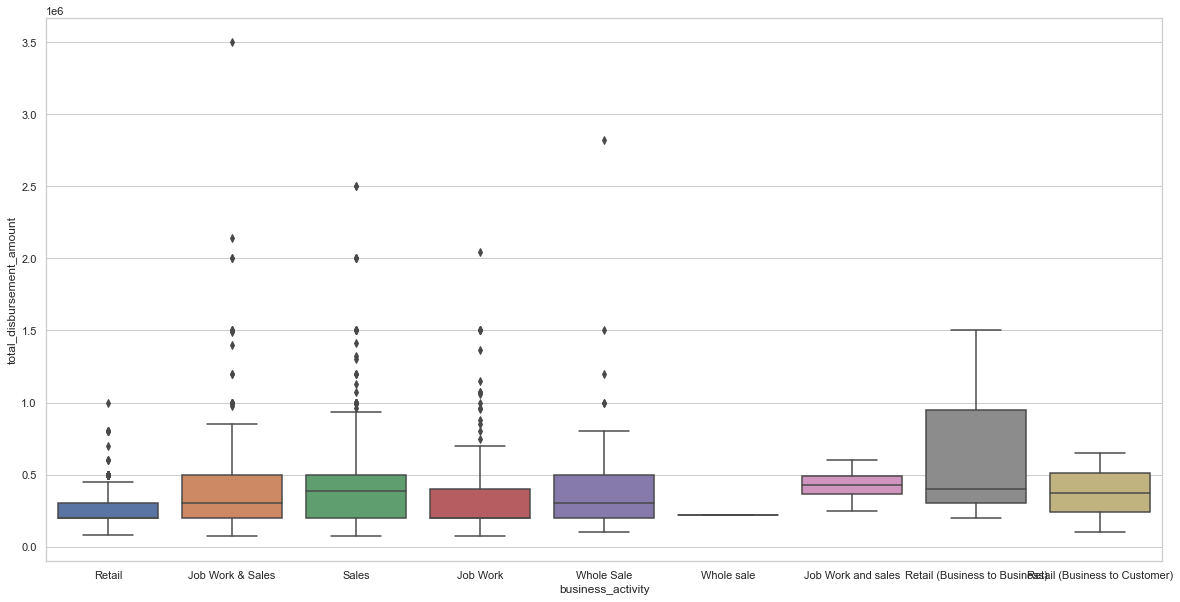

In [28]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="business_activity",y = "total_disbursement_amount", data=df )

### A histogtram plot to display the cibil status across all the existing account numbers and it is found to be impressive that fairly a good number of people have maintained it at excellence

<AxesSubplot:xlabel='cibil_status', ylabel='Count'>

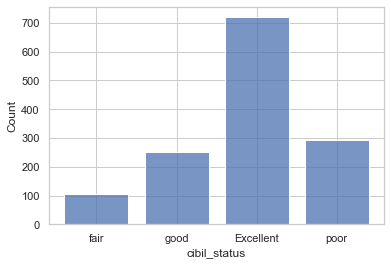

In [29]:
sns.histplot(data=df, x="cibil_status", shrink=.8)

### Bar plot showcasing how well the business sectors were able to make the total disbursement amount

<AxesSubplot:xlabel='total_disbursement_amount', ylabel='business_sector'>

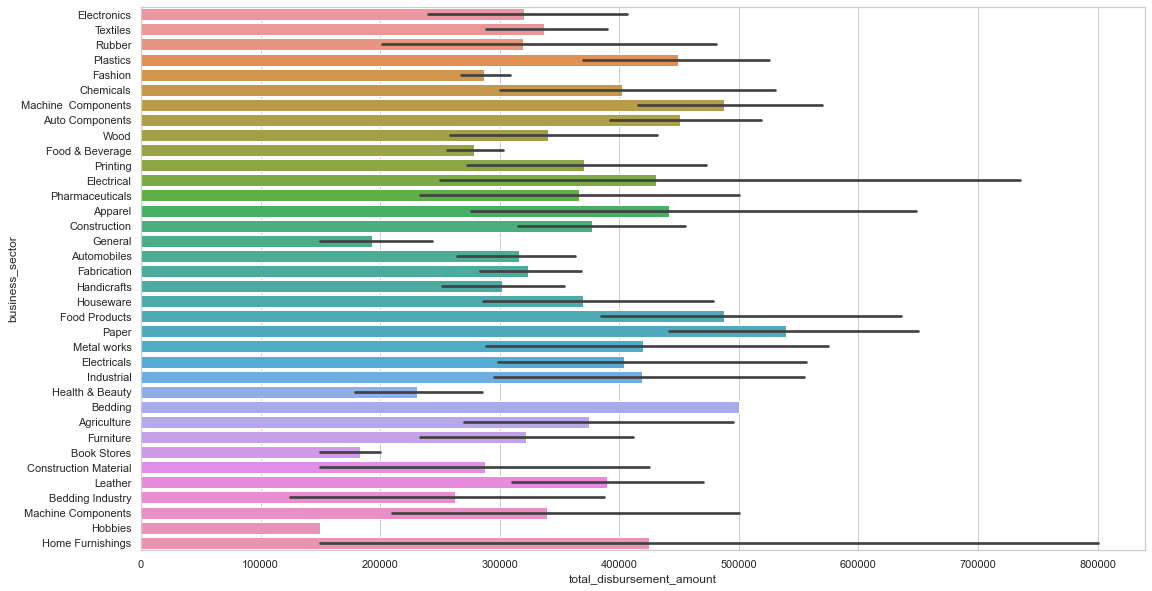

In [30]:
plt.figure(figsize=(18,10))
sns.barplot(data=df, x="total_disbursement_amount", y="business_sector")

### Tried correlation matrix to have a check on how well the features correlate with one another, but couldn't find any strong correlation

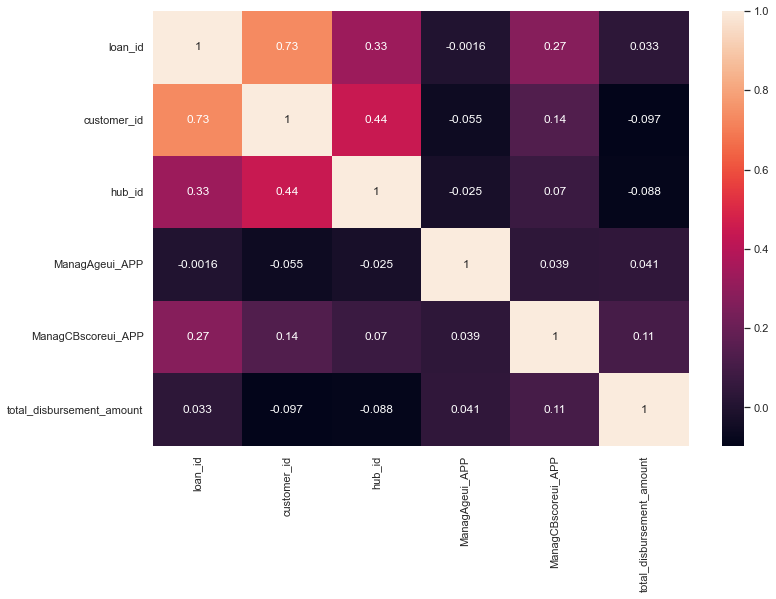

In [31]:
corrmat = df.corr()
plt.figure(figsize=(12,8))
g = sns.heatmap(corrmat, annot=True)

In [32]:
df.corr()

,loan_id,customer_id,hub_id,ManagAgeui_APP,ManagCBscoreui_APP,total_disbursement_amount
loan_id,1.000000,0.730803,0.330893,-0.001572,0.273686,0.033194
customer_id,0.730803,1.000000,0.444280,-0.055435,0.138158,-0.097254
hub_id,0.330893,0.444280,1.000000,-0.024559,0.070453,-0.088018
ManagAgeui_APP,-0.001572,-0.055435,-0.024559,1.000000,0.039265,0.041441
ManagCBscoreui_APP,0.273686,0.138158,0.070453,0.039265,1.000000,0.105704
total_disbursement_amount,0.033194,-0.097254,-0.088018,0.041441,0.105704,1.000000


### Gone through a set of websites made some research and came to a conclusion or assumption that the collateral feature is either secured or unsecured based on the cbscore and based on a website i found it to be greater than or equal to 700 for business purpose 

In [33]:
df['Collateral_Secured']= np.where( (df['ManagCBscoreui_APP']>699) , "Unsecured", "Secured" )

In [34]:
df

,loan_id,account_number,customer_id,enterprise_id,product_code,hub_id,business_type,business_activity,business_sector,ManagAgeui_APP,BusinFormalityOfTheBusinessui,ManagCBscoreui_APP,total_disbursement_amount,disbursement_month,cibil_status,Collateral_Secured
876,13613,TLWCU0003070,31083,10723.0,TLWCU,39,Trading,Retail,Electronics,30.0,Invoice & Banked,616.0,400000.0,Aug-2017,fair,Secured
877,49742,TLWCS0012623,119694,40426.0,TLWCS,27,Manufacturing,Job Work & Sales,Textiles,30.0,Cash & Non Banked,689.0,500000.0,Jan-2019,good,Secured
878,65458,TLWCS0016745,150404,50738.0,TLWCS,41,Manufacturing,Sales,Rubber,49.0,Invoice & Non Banked,793.0,400000.0,Jun-2019,Excellent,Unsecured
879,20064,TLWCS0002705,49773,17187.0,TLWCS,34,Manufacturing,Sales,Plastics,34.0,Invoice & Banked,718.0,500000.0,Dec-2017,good,Unsecured
880,4378,0014LTL2000211,6640,75.0,TLWCU,20,Trading,Retail,Fashion,46.0,Cash & Non Banked,0.0,150000.0,Jun-2016,poor,Secured
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2471,40097,TLWCU0010291,30173,10419.0,TLWCU,15,Trading,Retail,Fashion,40.0,Cash & Banked,765.0,500000.0,Sep-2018,Excellent,Unsecured
2472,20866,TLWCU0005932,12167,4369.0,TLWCU,3,Trading,Retail,Industrial,39.0,Cash & Non Banked,653.0,250000.0,Jan-2018,good,Secured
2473,43691,TLWCU0010995,105435,35679.0,TLWCU,30,Trading,Retail,Fashion,41.0,Cash & Non Banked,607.0,400000.0,Oct-2018,fair,Secured
2474,33894,TLWCS0006851,29274,10139.0,TLWCS,75,Trading,Whole Sale,Automobiles,35.0,Invoice & Banked,752.0,400000.0,Jul-2018,Excellent,Unsecured


In [35]:
df = df.replace({'Collateral_Secured': {"Secured": 1, "Unsecured": 0}})

In [36]:
y = df["Collateral_Secured"]

In [37]:
feat = df.iloc[:,:-1].values

In [38]:
col = list(df)

In [39]:
le = LabelEncoder()

In [40]:
feat[:,4] = le.fit_transform(feat[:,4])
feat[:,6] = le.fit_transform(feat[:,6])
feat[:,7] = le.fit_transform(feat[:,7])

In [41]:
df = pd.DataFrame(feat)

In [42]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,13613,TLWCU0003070,31083,10723.0,14,39,2,3,Electronics,30.0,Invoice & Banked,616.0,400000.0,Aug-2017,fair
1,49742,TLWCS0012623,119694,40426.0,13,27,0,1,Textiles,30.0,Cash & Non Banked,689.0,500000.0,Jan-2019,good
2,65458,TLWCS0016745,150404,50738.0,13,41,0,6,Rubber,49.0,Invoice & Non Banked,793.0,400000.0,Jun-2019,Excellent
3,20064,TLWCS0002705,49773,17187.0,13,34,0,6,Plastics,34.0,Invoice & Banked,718.0,500000.0,Dec-2017,good
4,4378,0014LTL2000211,6640,75.0,14,20,2,3,Fashion,46.0,Cash & Non Banked,0.0,150000.0,Jun-2016,poor


In [43]:
rename = dict()
for idx, val in enumerate(col):
    rename[idx] = val

In [44]:
df.rename(columns=rename, inplace=True)

In [45]:
df.head()

,loan_id,account_number,customer_id,enterprise_id,product_code,hub_id,business_type,business_activity,business_sector,ManagAgeui_APP,BusinFormalityOfTheBusinessui,ManagCBscoreui_APP,total_disbursement_amount,disbursement_month,cibil_status
0,13613,TLWCU0003070,31083,10723.0,14,39,2,3,Electronics,30.0,Invoice & Banked,616.0,400000.0,Aug-2017,fair
1,49742,TLWCS0012623,119694,40426.0,13,27,0,1,Textiles,30.0,Cash & Non Banked,689.0,500000.0,Jan-2019,good
2,65458,TLWCS0016745,150404,50738.0,13,41,0,6,Rubber,49.0,Invoice & Non Banked,793.0,400000.0,Jun-2019,Excellent
3,20064,TLWCS0002705,49773,17187.0,13,34,0,6,Plastics,34.0,Invoice & Banked,718.0,500000.0,Dec-2017,good
4,4378,0014LTL2000211,6640,75.0,14,20,2,3,Fashion,46.0,Cash & Non Banked,0.0,150000.0,Jun-2016,poor


### Selecting a set of features to y variable that might be useful for the prediction

In [46]:
x = df[["product_code", "business_type", "business_activity", "ManagAgeui_APP", "ManagCBscoreui_APP", "total_disbursement_amount"]]

### Using train test split so that we divide the data into training and testing ratio before we fit to the model

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [48]:
logmodel = LogisticRegression()

### Fitting the train and test data to logistic regression model

In [49]:
logmodel.fit(x_train, y_train)

LogisticRegression()

In [50]:
predictions = logmodel.predict(x_test)

### generating classification report, confusion matrix and accuracy score

In [51]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88       251
           1       0.97      0.58      0.73       160

    accuracy                           0.83       411
   macro avg       0.88      0.78      0.80       411
weighted avg       0.86      0.83      0.82       411



In [52]:
confusion_matrix(y_test, predictions)

array([[248,   3],
       [ 67,  93]], dtype=int64)

In [54]:
print(accuracy_score(y_test, predictions))

0.829683698296837


### making assumptions was getting harder as i feel i could've made better assumptions and worked better if there was more data, i felt and was unsure about if the data was enough for the analysis. would have been happier if i had known about the date they lend money, the income or salary and few other details like this in the dataset. I also agree that i should've done better probably and here i am with my assumptions about what i think about the problem statement 

### Thank you for this tricky assesment, gained a lot of learning from this !!!